 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [885]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [886]:
# Reading whale returns
whale_df = pd.read_csv("./Resources/whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [887]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [888]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [889]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [890]:
# Reading algorithmic returns
algo_df = pd.read_csv("./Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [891]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [892]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [893]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [894]:
# Reading S&P TSX 60 Closing Prices
sp_df = pd.read_csv("./Resources/sp_tsx_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [895]:
# Check Data Types
sp_df.dtypes
# Removing all special characters for the calculations
sp_df["Close"] = sp_df["Close"].str.replace('[^\w.]|_', '', regex=True)

sp_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [896]:
# Fix Data Types
sp_df["Close"] = sp_df["Close"].astype(float)

sp_df.dtypes


Close    float64
dtype: object

In [897]:
# Calculate Daily Returns
# pct_change function calculates the daily returns 
sp_daily_returns = sp_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [898]:
# Drop nulls
# removing all null values and 
# inplace=True means change the base dataframe itself without returning a new value 
sp_df.dropna(inplace=True)
sp_df.isna().sum()

Close    0
dtype: int64

In [899]:
# Rename `Close` Column to be specific to this portfolio.
# renaming the colums. In this case, we are going to change only one colum name 
sp_df.rename(columns={"Close":"S&P Close"}, inplace=True)
sp_df.head()

,S&P Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [900]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#Since the S&P csv contains the closing price, it is required to convert the values into daily retunrs 
# Therefore while combining the charts sp_df.pct_change() is used
con_df = pd.concat([whale_df, algo_df, sp_df.pct_change()], axis="columns", join="inner")
con_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

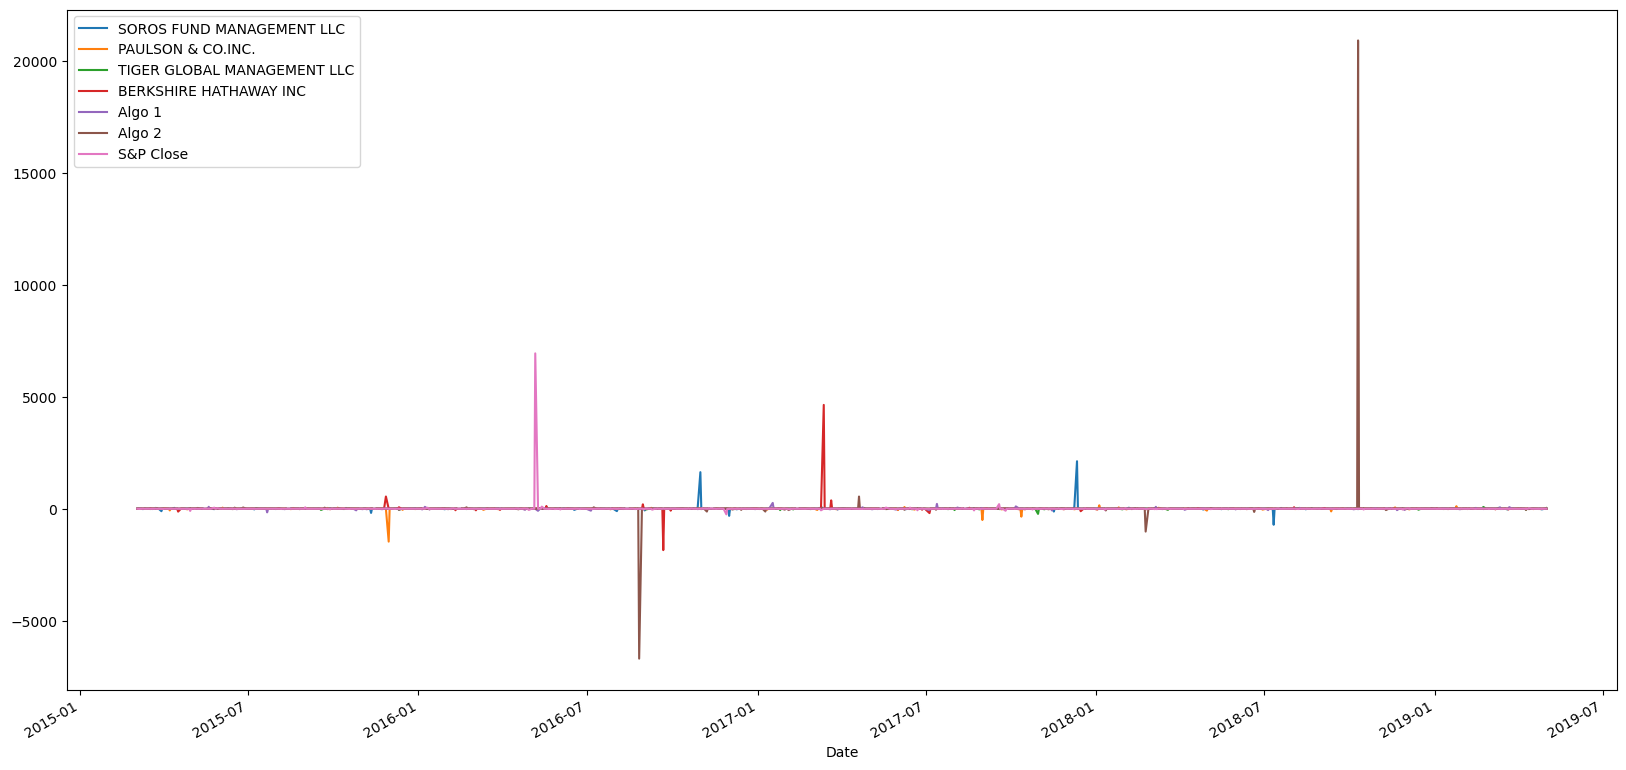

In [901]:
# Plot daily returns of all portfolios
con_daily_returns_df = con_df.pct_change()
con_daily_returns_df.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

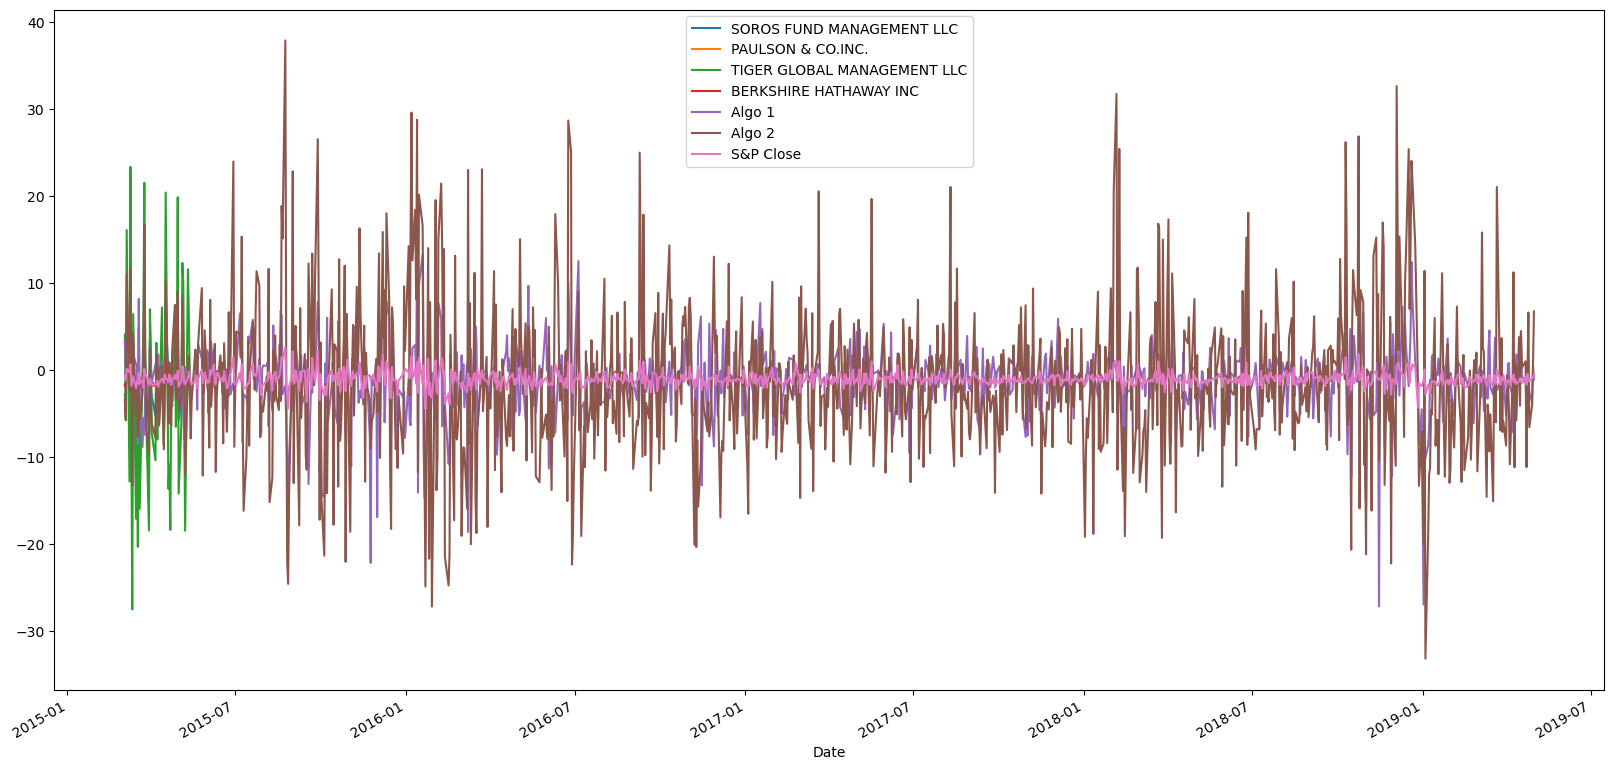

In [902]:
# Calculate cumulative returns of all portfolios
cumulative_con_daily_returns_df = (1 + con_daily_returns_df).cumprod() -1

# Plot cumulative returns
cumulative_con_daily_returns_df.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

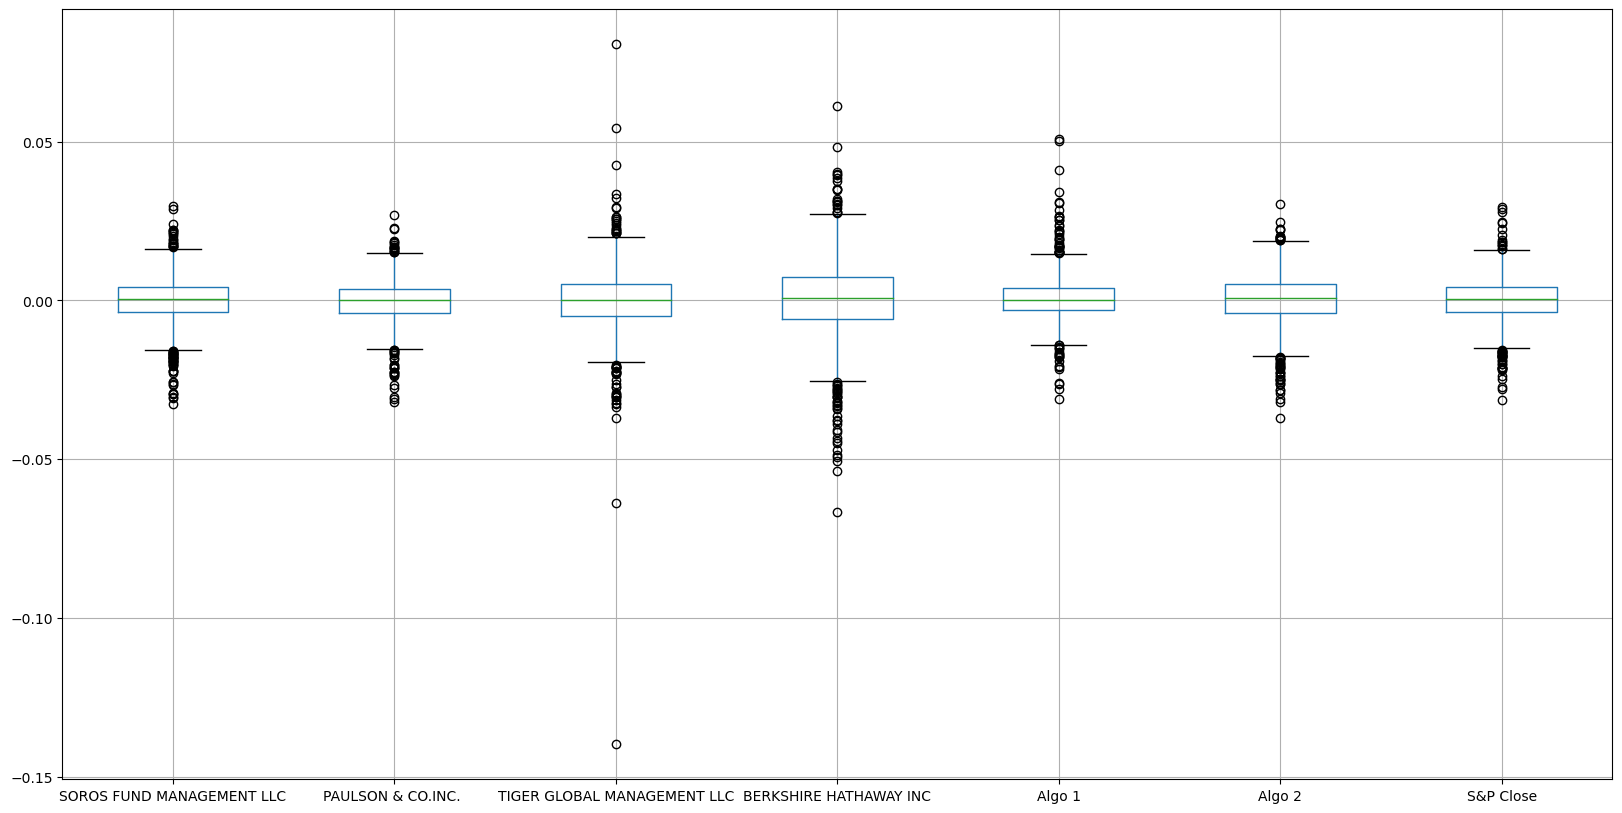

In [903]:
# Box plot to visually show risk
# box plot for combined plots
con_df.boxplot(figsize=(20, 10))

<AxesSubplot:>

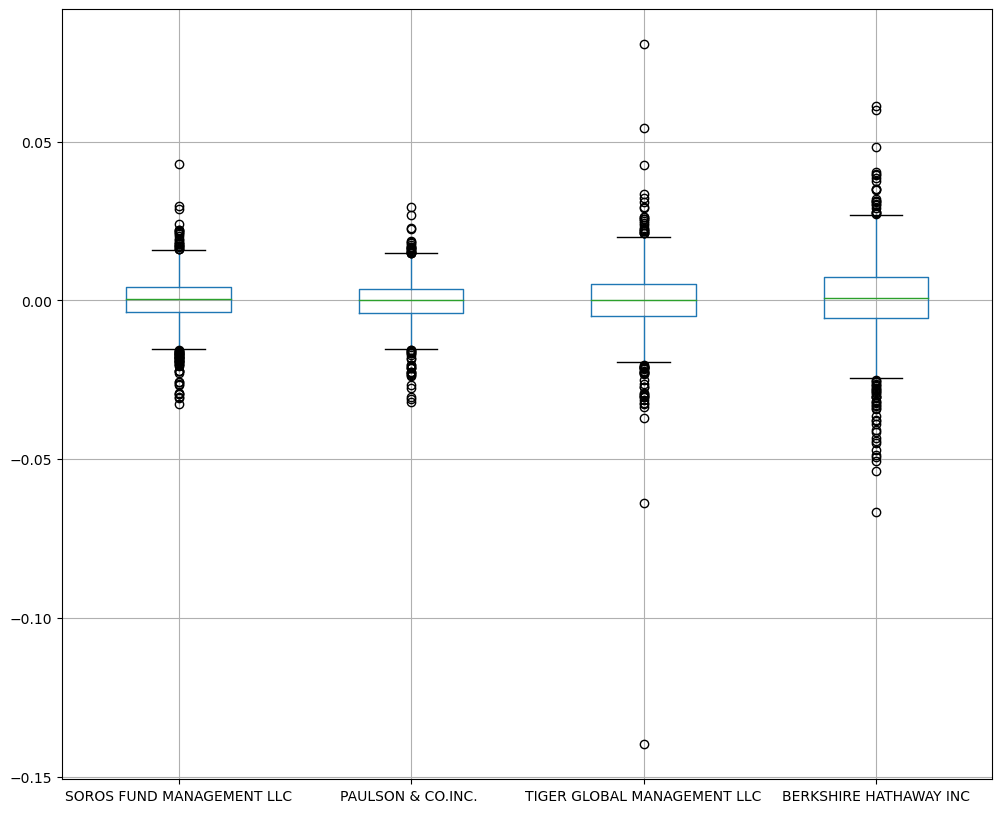

In [944]:
# Box plot for whale df
whale_df.boxplot(figsize=(12, 10))

<AxesSubplot:>

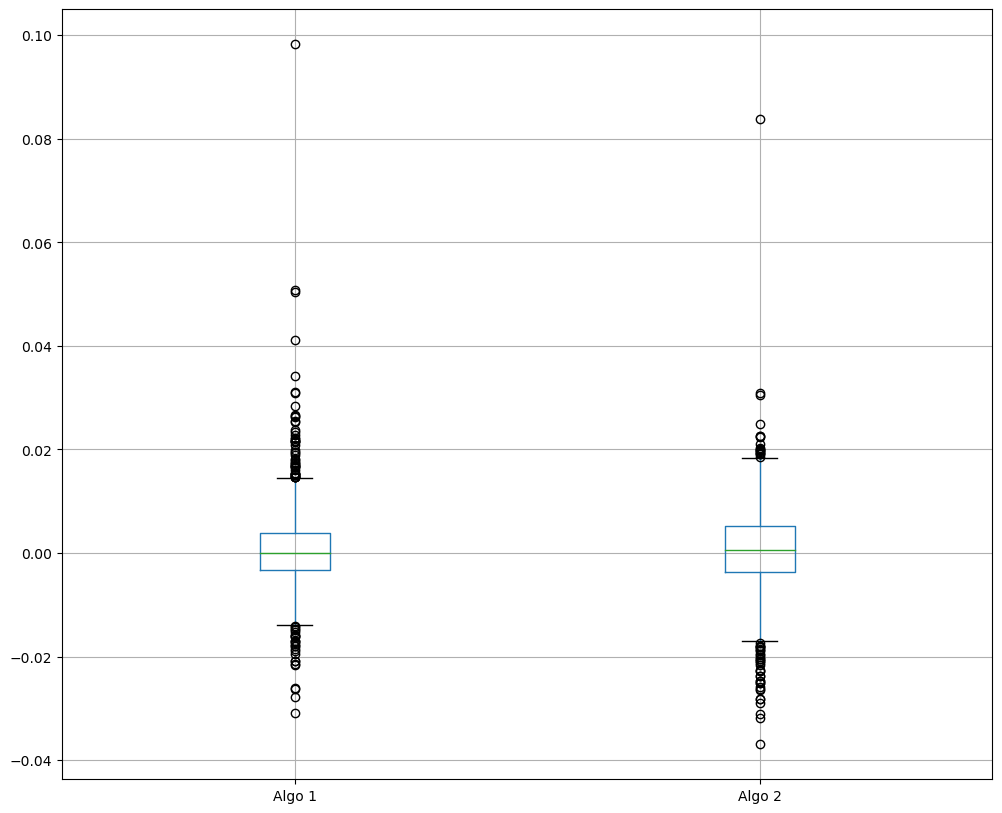

In [945]:
# Box plot for algorithmic trading
algo_df.boxplot(figsize=(12, 10))

<AxesSubplot:>

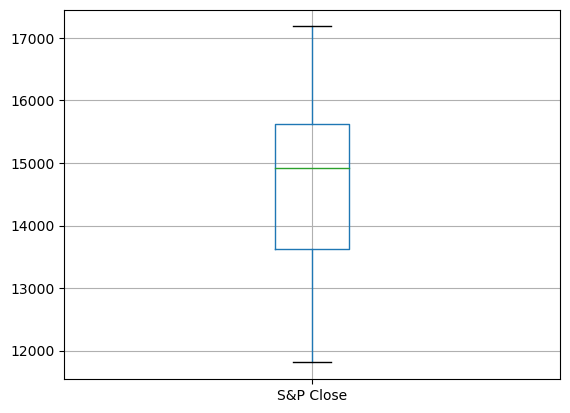

In [946]:
# Box plot for S&P returns
sp_df.boxplot()

### Calculate Standard Deviations

In [907]:
# Calculate the daily standard deviations of all portfolios
# ddof =0 to indicated 0 instead of NA
con_df.dropna(inplace=True)
con_std = con_df.std(ddof=0)

con_std

SOROS FUND MANAGEMENT LLC      0.007824
PAULSON & CO.INC.              0.006979
TIGER GLOBAL MANAGEMENT LLC    0.010877
BERKSHIRE HATHAWAY INC         0.012819
Algo 1                         0.007585
Algo 2                         0.008322
S&P Close                      0.007031
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [908]:
# Calculate  the daily standard deviation of S&P TSX 60
# Get the standard deviation of the daily returns 
# Since we already have calvulated all standard deviations for the combined data frame, we can simply get the S&P standard deviation by accessing the con_std variable
sp_std_val = con_std["S&P Close"]
print(f"standard deviation of the S&P is {sp_std_val}\n")


# Determine which portfolios are riskier than the S&P TSX 60
for col_name in con_df:
    if con_std[col_name] > sp_std_val:
        print(f"{col_name} is risker than S&P")

standard deviation of the S&P is 0.007030748954816322

SOROS FUND MANAGEMENT LLC is risker than S&P
TIGER GLOBAL MANAGEMENT LLC is risker than S&P
BERKSHIRE HATHAWAY INC is risker than S&P
Algo 1 is risker than S&P
Algo 2 is risker than S&P


### Calculate the Annualized Standard Deviation

In [909]:
# Calculate the annualized standard deviation (252 trading days)
anual_std = con_std*np.sqrt(252)
anual_std

SOROS FUND MANAGEMENT LLC      0.124199
PAULSON & CO.INC.              0.110787
TIGER GLOBAL MANAGEMENT LLC    0.172675
BERKSHIRE HATHAWAY INC         0.203500
Algo 1                         0.120411
Algo 2                         0.132113
S&P Close                      0.111610
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

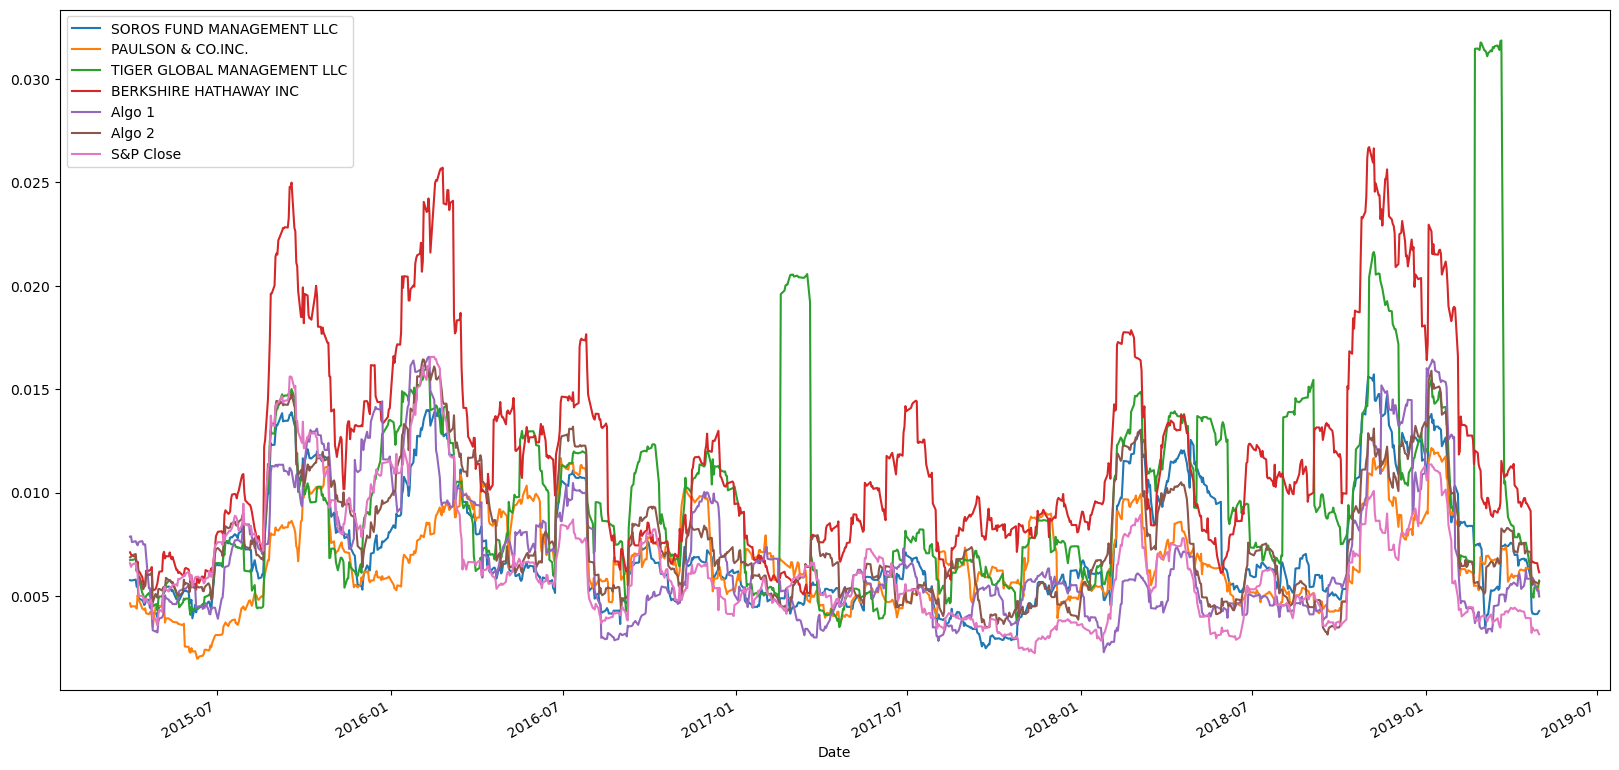

In [910]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = con_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

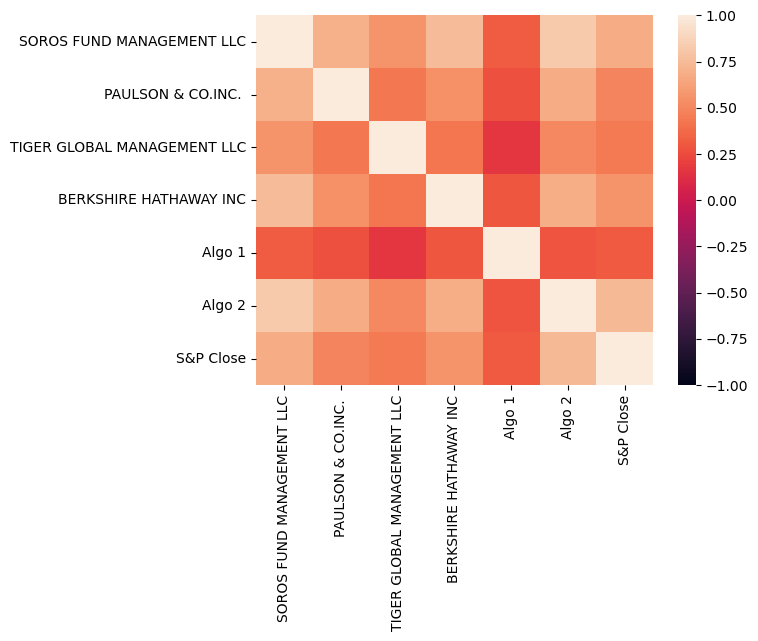

In [911]:
# Calculate the correlation
# corr function of the Dataframe returns the correlations 
cor = con_df.corr()

# Display de correlation matrix
sns.heatmap(cor, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

The covariance of algo 1 is 1.6563000308911375e-05
beta = 0.3347445908185684


<AxesSubplot:xlabel='Date'>

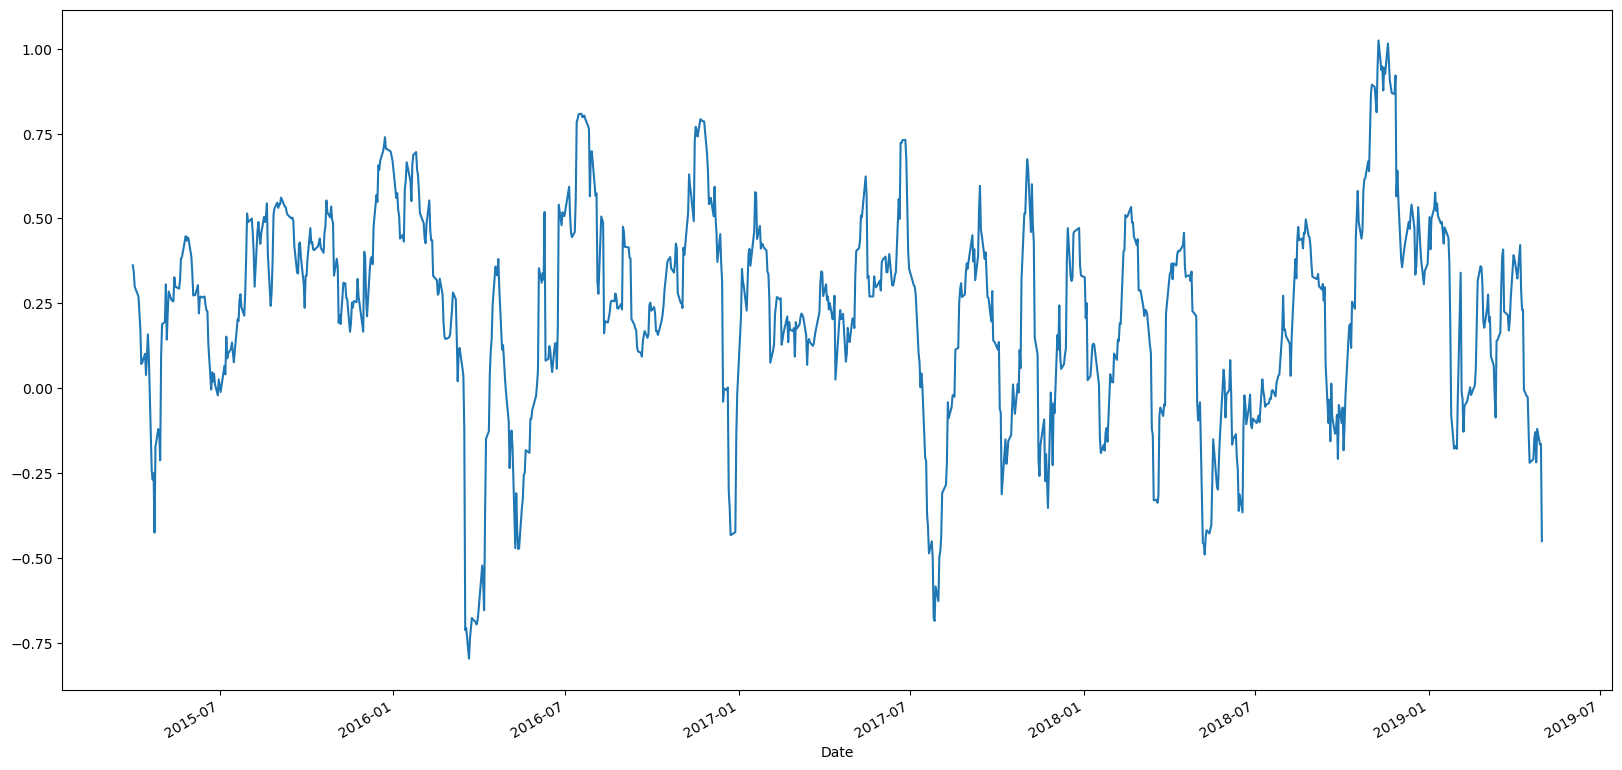

In [912]:
# Calculate covariance of a single portfolio
# It is required to use the S&P and the selected portfolio to calculate the covariance
covar_algo = con_df["Algo 1"].cov(con_df["S&P Close"])
print(f"The covariance of algo 1 is {covar_algo}")

# Calculate variance of S&P TSX
# var function of the dataframe returns the variance 
sp_var = con_df["S&P Close"].var()

# Computing beta
sp_beta = covar_algo / sp_var
print(f"beta = {sp_beta}")

# Plot beta trend
# In order to create a plot, it is required to get an array of data. 
# Since, var and cov functions by default returns an float, rolling function could be used to get a list of records as an alternative approach
rolling_cov=con_df["Algo 1"].rolling(window=21).cov(con_df["S&P Close"])
rolling_var=con_df["S&P Close"].rolling(window=21).var()
rolling_beta = rolling_cov / rolling_var
rolling_beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

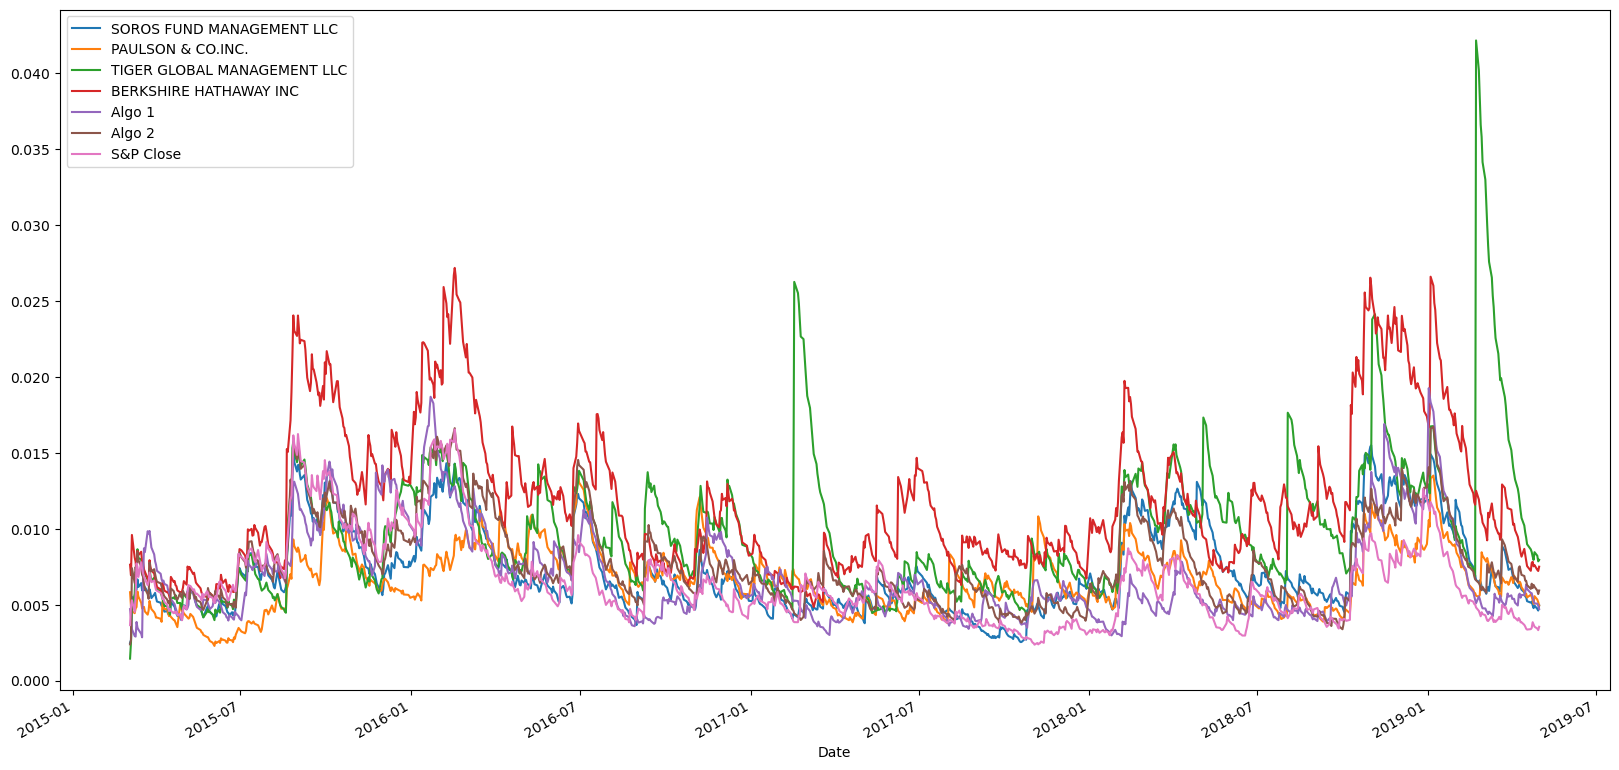

In [913]:
# Use `ewm` to calculate the rolling window
con_ewn = con_df.ewm(span=21).std()

# Ploting the ewn of the combinated dataframe
con_ewn.plot(figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [914]:
# Annualized Sharpe Ratios
# mean function of the Dataframe returns the mean and std returns the standard deviation 
# 252 is the annual number of days
sharpe_ratio = (con_df.mean() * 252) / (con_df.std()* np.sqrt(252))
sharpe_ratio.head()

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio of the Returns'}>

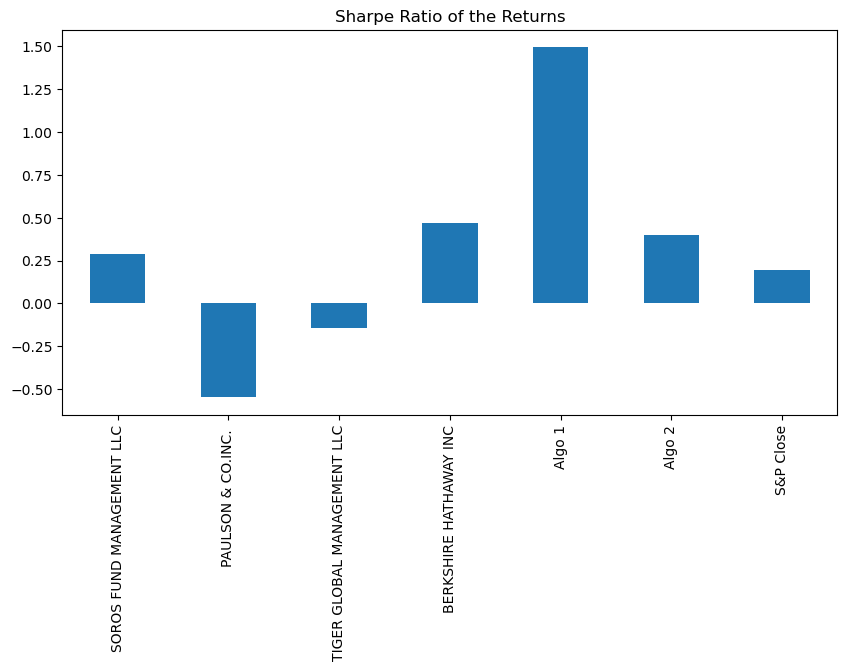

In [915]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratio of the Returns", figsize=(10, 5))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The Algo 1 strategy performed better than all of the other strategies. However, Algo 2 provided the investors with moderate returns. Nevertheless, when it comes to the average of the Algo sharpe ratios, it could be concluded that the algorithmic strategies in general perform better than the others.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [916]:
# Reading data from 1st stock
l_df = pd.read_csv("./Resources/l_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [917]:
# Reading data from 2nd stock
otex_df = pd.read_csv("./Resources/otex_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [918]:
# Reading data from 3rd stock
shop_df = pd.read_csv("./Resources/shop_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [919]:
# Combine all stocks in a single DataFrame

# Plese note that the following approach has been commented because, in the following sections there are instructions to change the colum names after loaded it 
# before combining the data frames, it is required to rename the Colose colum name
# Otherwise, there could be multiple colums with the same name
#l_df.rename(columns={"Close":"L"}, inplace=True)
#otex_df.rename(columns={"Close":"Otex"}, inplace=True)
#shop_df.rename(columns={"Close":"Shop"}, inplace=True)

custom_con_df = pd.concat([l_df, otex_df, shop_df], axis="columns", join="inner")
custom_con_df.head()


,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [920]:
# Reset Date index
# To reset date index, all dates will be replaced by index via the following function call
custom_con_df.reset_index(drop=True)
custom_con_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [921]:
# Reorganize portfolio data by having a column per symbol
custom_con_df.drop(columns=["Symbol"], inplace=True)
custom_con_df.columns = ["L", "OTEX", "SHOP"]
custom_con_df.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [922]:
# Calculate daily returns
custom_daily_returns_df = custom_con_df.pct_change()

# Drop NAs
custom_con_df.dropna()

# Display sample data
custom_daily_returns_df.head()


,L,OTEX,SHOP
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [923]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = custom_daily_returns_df.dot(weights)

# Display sample data
weighted_returns.head()


Date
2018-01-02         NaN
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [924]:
# Join your returns DataFrame to the original returns DataFrame
# Assumption, the meaning of the "DataFrame that contains all of the portfolio" is the first combined data frame. 
con_df["Weight Returns"] = weighted_returns

In [925]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
con_df.dropna(inplace=True)

con_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close,Weight Returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [926]:
# Calculate the annualized `std`
custom_annual_std = custom_daily_returns_df.std()*np.sqrt(252)
custom_annual_std

L       0.152369
OTEX    0.215132
SHOP    0.488717
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

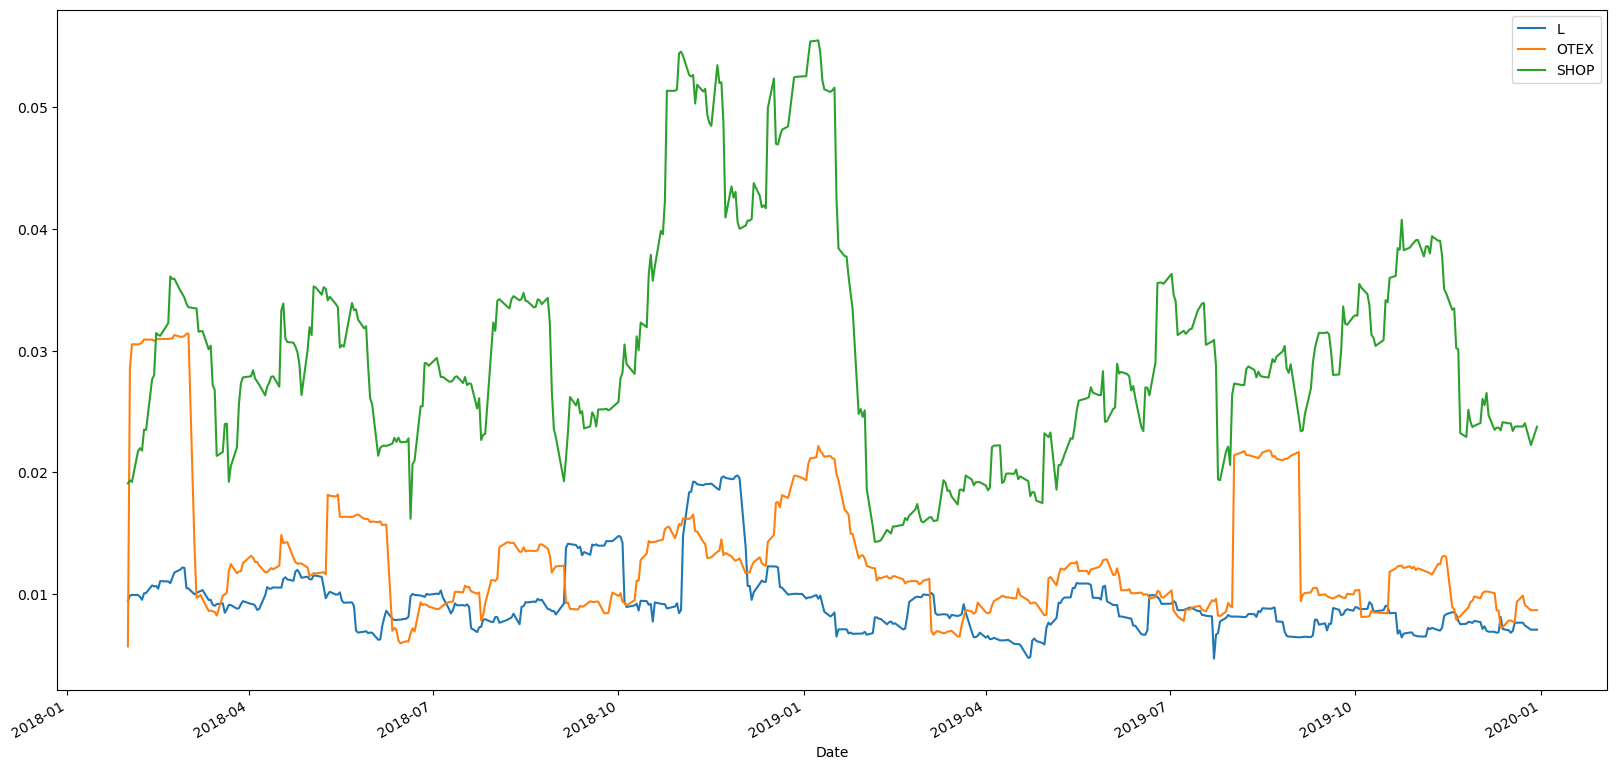

In [927]:
# Calculate rolling standard deviation
custom_rolling_std = custom_daily_returns_df.rolling(window=21).std()

# Plot rolling standard deviation
custom_rolling_std.plot(figsize=(20, 10))


### Calculate and plot the correlation

<AxesSubplot:>

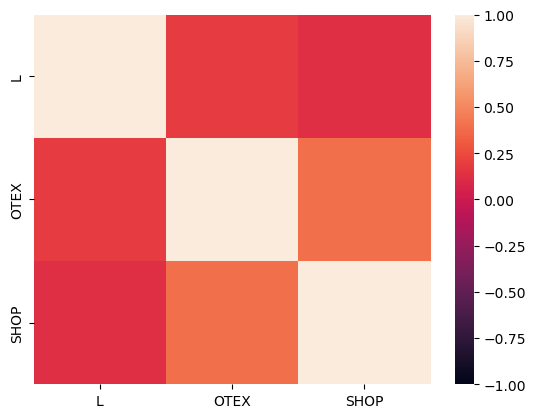

In [928]:
# Calculate and plot the correlation
custom_cor = custom_daily_returns_df.corr()
sns.heatmap(custom_cor, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

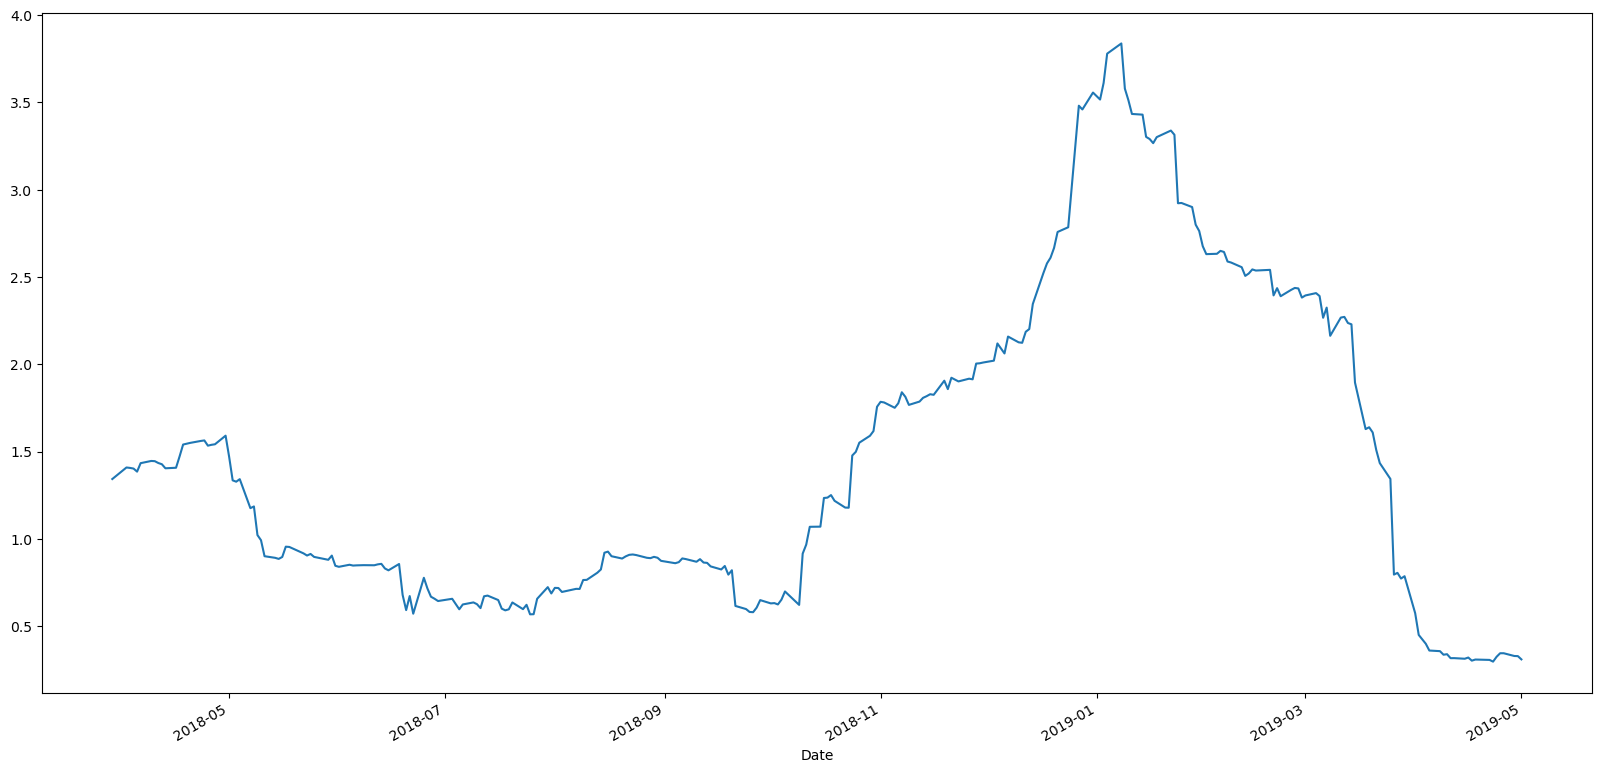

In [937]:
# Calculate and plot Beta
custom_cov = con_df["Weight Returns"].rolling(window=60).cov(con_df["S&P Close"])
custom_var = con_df["S&P Close"].var()
custom_beta = custom_cov / custom_var 
custom_beta.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [939]:
# Calculate Annualized Sharpe Ratios
custom_annual_sharpe_ratio = (con_df.mean() * 252) / (con_df.std()* np.sqrt(252))

<AxesSubplot:>

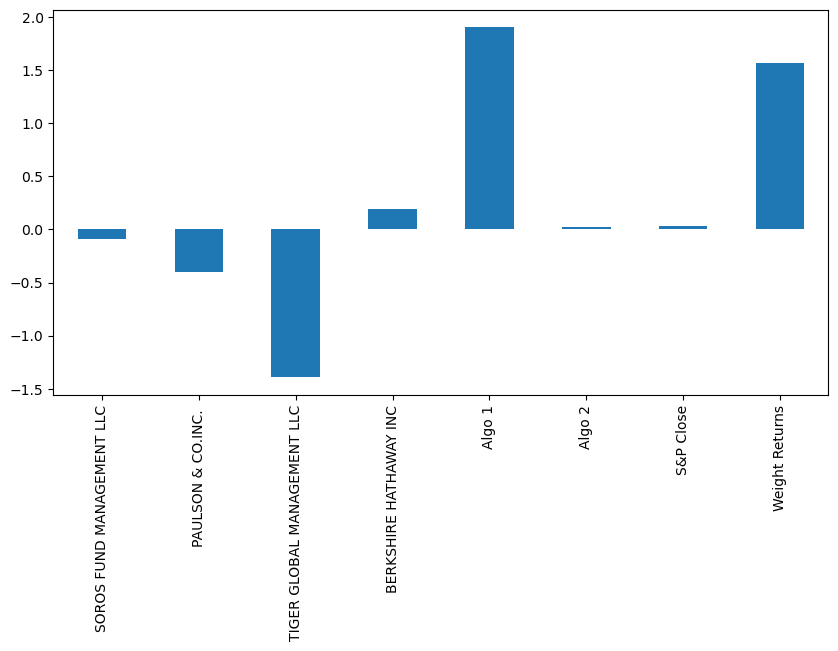

In [941]:
# Visualize the sharpe ratios as a bar plot
custom_annual_sharpe_ratio.plot(kind="bar", figsize=(10, 5))

### How does your portfolio do?

Write your answer here!

In [ ]:
According to analysis, the custom stock which is indicated by the “Weight Returns” performs just below the Algo 1. 
However, since this is a combination of three stocks and the performance is almost similar to the Algo 1, 
the custom stock could be considered to be the best option available. 
